In [ ]:
print 'python'

First attempt at an Ariane run. 

This notebook will analyze results from the preset qualitative example. (examples/qualitative in the Ariane directory)

A few notes on Ariane:

1. To compile and install on salish, I followed the instructions in the download pacakge (version 2.2.6) with the following settings:
    * export NETCDF_INC=/usr/include
    * export NETCDF_LIB=/usr/lib
    *  ./configure prefix=/ocean/nsoontie/MEOPAR/Ariane (modify to wherever you would like to store Ariane)
    * After install: export PATH=/ocean/nsoontie/MEOPAR/Ariane/bin:$PATH

2. In my /ocean/nsoontie/MEOPAR/Ariane directory, I started by trying to run one of their given examples. This is located in examples/qualitative. I found that I needed to create my own initial_positions.txt file by copying the 3 lines of numbers in their given initial_positions file. After that typing ariane runs the code.

3. I checked the calculations by running the experiment backwards as described in the ariant tutorial

4. The three manuals (docs/manuals) are useful to read, particularly for installing and compiling the code. It is also important to be familiar with these documents when we try to set up our tracjectories from the Salish Sea model.

Next I will try to load the data and plot some trajectories

In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from salishsea_tools import (nc_tools,viz_tools)

In [2]:
f= NC.Dataset('/ocean/nsoontie/MEOPAR/Ariane/examples/qualitative/ariane_trajectories_qualitative.nc','r');

In [3]:
nc_tools.show_variables(f)

[u'init_x', u'init_y', u'init_z', u'init_t', u'init_age', u'init_transp', u'final_x', u'final_y', u'final_z', u'final_t', u'final_age', u'final_transp', u'traj_lon', u'traj_lat', u'traj_depth', u'traj_time', u'traj_temp', u'traj_salt', u'traj_dens']


In [4]:
nc_tools.show_dimensions(f)

<type 'netCDF4.Dimension'>: name = 'ntraj', size = 3

<type 'netCDF4.Dimension'>: name = 'nb_output', size = 56



In [5]:
lon=f.variables['traj_lon']
lat=f.variables['traj_lat']
dep=f.variables['traj_depth']
print lon

<type 'netCDF4.Variable'>
float64 traj_lon(nb_output, ntraj)
    title: What is traj_lon ?
    longname: Trajectory: x positions
    units: No dimension
    missing_value: 1e+20
unlimited dimensions: 
current shape = (56, 3)
filling off



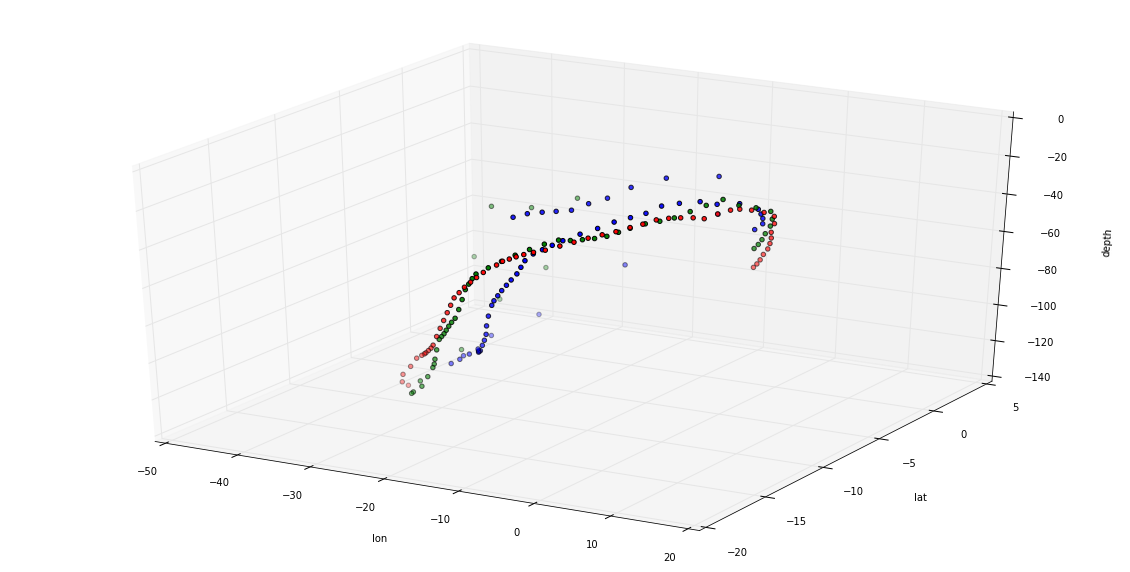

In [6]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
colors=['b','g','r']

for i  in range(3):
    ax.scatter(lon[:,i],lat[:,i],dep[:,i],c=colors[i])

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')

Here were see the trajecoties of three different particles in blue, green, and red. I'm not exactly sure where this data came from but I would assume it is some kind of global ocean model.
Apparently 3D scatter plots set transparency based on distance from camera... 

Things to think about:

1. How should we visualize the data? Some easy things would be to include markers for the starting and ending positions.
2. Is Ariane's quantitative mode useful to us? 
3. How often should we save data to be used in Ariane? How different are the ending locations if we use save every 1hour or every 4 hours, etc?
4. How many particles should we use?
5. Can we keep the particles constrained to the surface?

# Salish Sea Particles

First attempt at a Salish Sea particle tracking from hourly output in dec 2006 storm surge simulation. Particle was placed in the Fraser River plume initially. The particles is constrained to the surface.

* **Ariane output:** /ocean/nsoontie/MEOPAR/Ariane/results/dec2006/1hour
    * namelists, initial_positions.txt, etc in here

* **NEMO output:** /data/nsoontie/MEOPAR/SalishSea/results/storm-surges/tide_fix/dec2006/all_forcing/1hour

Note: I had to create a mesh_mask.nc file because Ariane needs the tmask. I will add this to NEMO-forcing.

In [7]:
#Ariane
f= NC.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/dec2006/1hour/ariane_trajectories_qualitative.nc','r');
lont=f.variables['traj_lon']
latt=f.variables['traj_lat']
dept=f.variables['traj_depth']

xs=f.variables['init_x']
ys=f.variables['init_y']

#Bathymetry
fB = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc','r')
lats = fB.variables['nav_lat']
lons = fB.variables['nav_lon']
D = fB.variables['Bathymetry']
print ys[0]

440.0


(48.8, 49.5)

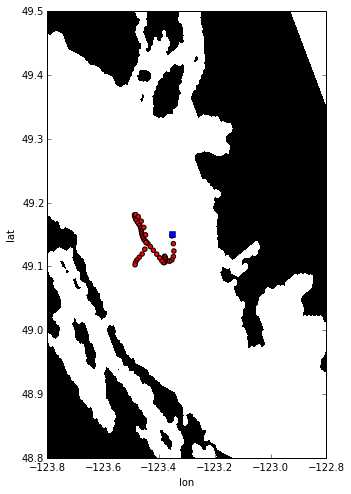

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5,8))

ax.scatter(lont[:,0],latt[:,0],c='r')
ax.plot(lons[int(ys[0]),int(xs[0])],lats[int(ys[0]),int(xs[0])], 's')
viz_tools.plot_land_mask(ax,fB,coords='map')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim([-123.8,-122.8])
ax.set_ylim([48.8,49.5])

Blue square indicates initial drop. This is just a quick test to see if I could get Ariane running. We will need to think more carefully about the set up later one. 